In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [2]:
import os

# Get all the data.csv
eeg_datas = os.listdir('eeg_datas')
eeg_datas

['EEG_recording_2024-04-24-19.00.07.csv',
 'EEG_recording_2024-04-24-19.05.17.csv',
 'EEG_recording_2024-04-24-19.11.43.csv',
 'EEG_recording_2024-04-25-05.35.25.csv',
 'EEG_recording_2024-04-25-05.39.15.csv',
 'EEG_recording_2024-04-25-05.44.26.csv',
 'EEG_recording_2024-04-25-05.48.02.csv',
 'EEG_recording_2024-04-25-05.51.32.csv',
 'EEG_recording_2024-04-25-05.54.51.csv',
 'EEG_recording_2024-04-25-05.58.59.csv',
 'EEG_recording_2024-04-25-06.02.26.csv',
 'EEG_recording_2024-04-25-06.06.53.csv',
 'EEG_recording_2024-04-25-06.10.20.csv',
 'EEG_recording_2024-04-25-06.13.48.csv',
 'EEG_recording_2024-04-25-06.17.39.csv',
 'EEG_recording_2024-04-25-06.21.22.csv',
 'EEG_recording_2024-04-25-06.24.58.csv',
 'EEG_recording_2024-04-25-06.28.27.csv',
 'EEG_recording_2024-04-25-06.34.05.csv',
 'EEG_recording_2024-04-25-06.37.34.csv',
 'EEG_recording_2024-04-25-06.41.19.csv',
 'EEG_recording_2024-04-25-06.44.49.csv',
 'EEG_recording_2024-04-25-06.49.33.csv',
 'EEG_recording_2024-04-25-06.56.5

In [3]:
#Storing csv to dfs
eeg_dfs = []
for eeg_data in eeg_datas:
    path = os.path.join('eeg_datas', eeg_data)
    df = pd.read_csv(path)
    eeg_dfs.append(df)

In [4]:
from tqdm import tqdm

channels = ['TP9', 'TP10', 'AF7', 'AF8']
filtered_dfs = []

# Iterate through each EEG recording
for i in tqdm(range(len(eeg_dfs))):
    # Extract data from DataFrame
    df = eeg_dfs[i]
    trial_data = df[channels].values.T[:, :]

    # Create MNE info object
    info = mne.create_info(ch_names=channels, sfreq=256, ch_types='eeg')
    
    # Create RawArray and apply filtering
    raw = mne.io.RawArray(trial_data, info)
    raw.filter(l_freq=1, h_freq=40)
    raw.set_eeg_reference(ref_channels='average')
    
    # Extract and process filtered data
    filtered_data = raw.get_data()
    filtered_df = pd.DataFrame(filtered_data.T, columns=channels)
    filtered_df['timestamps'] = df[['timestamps']]
    
    # Concatenate
    filtered_dfs.append(filtered_df)    

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=4, n_times=47557
    Range : 0 ... 47556 =      0.000 ...   185.766 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


  4%|███▏                                                                               | 1/26 [00:00<00:09,  2.64it/s]

Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter f

 23%|███████████████████▏                                                               | 6/26 [00:00<00:01, 15.20it/s]

Creating RawArray with float64 data, n_channels=4, n_times=47557
    Range : 0 ... 47556 =      0.000 ...   185.766 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter f

 42%|██████████████████████████████████▋                                               | 11/26 [00:00<00:00, 23.85it/s]

Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter f

 62%|██████████████████████████████████████████████████▍                               | 16/26 [00:00<00:00, 30.75it/s]

Creating RawArray with float64 data, n_channels=4, n_times=47519
    Range : 0 ... 47518 =      0.000 ...   185.617 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=4, n_times=39826
    Range : 0 ... 39825 =      0.000 ...   155.566 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter f

 81%|██████████████████████████████████████████████████████████████████▏               | 21/26 [00:00<00:00, 36.12it/s]

Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=4, n_times=47520
    Range : 0 ... 47519 =      0.000 ...   185.621 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter f

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 28.69it/s]


In [5]:
# Concatonate the dfs into a sing data frame
eeg_df = pd.concat(filtered_dfs, ignore_index=True)

#Reseting the index
eeg_df = eeg_df.reset_index(drop=True)

In [6]:
# Convert unix time to date time 
eeg_df['timestamps'] = pd.to_datetime(eeg_df['timestamps'])

# Sorting the value based on date time 
eeg_df =  eeg_df.sort_values(by='timestamps')

In [7]:
# Getting the event logs 
log_dfs = []

for log in os.listdir('./logs'):
    if log.endswith('.csv'):
        path = os.path.join('./logs', log)
        df = pd.read_csv(path)
        log_dfs.append(df)
        
# Concatonate all logs into one
log_df = pd.concat(log_dfs, ignore_index=True)
log_df = log_df.reset_index(drop=True)

In [8]:
log_df.head(5)

,Timestamp,Event
0,1.713985e+09,cooldown
1,1.713985e+09,cls
2,1.713985e+09,cooldown
3,1.713985e+09,pop
4,1.713985e+09,cooldown


<Axes: xlabel='count', ylabel='Event'>

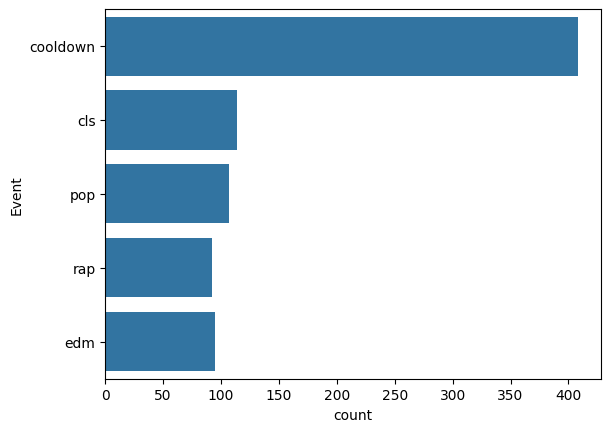

In [9]:
# Plot the amount of events on the logs
sns.countplot(log_df['Event'])

In [10]:
# Removed cooldown from events
log_df = log_df[log_df['Event'] != 'cooldown']
log_df.head(5)

,Timestamp,Event
1,1.713985e+09,cls
3,1.713985e+09,pop
5,1.713985e+09,pop
7,1.713985e+09,rap
9,1.713985e+09,cls


In [11]:
# Convert Unix timestamp to date time 
log_df['Timestamp'] = pd.to_datetime(log_df['Timestamp'])

test_log_df = log_df[(log_df['Event'] != 'rap') & (log_df['Event'] != 'edm')]
test_log_df.head(5)

,Timestamp,Event
1,1970-01-01 00:00:01.713985205,cls
3,1970-01-01 00:00:01.713985216,pop
5,1970-01-01 00:00:01.713985226,pop
9,1970-01-01 00:00:01.713985251,cls
11,1970-01-01 00:00:01.713985265,cls


In [24]:
# Get dummies to feed into model 
y = pd.get_dummies(log_df['Event'])


In [13]:
# Calculation functions
from scipy import stats

def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
    return np.var(data,axis=-1)

def minim(data):
    return np.min(data,axis=-1)

def maxim(data):
    return np.max(data,axis=-1)

def argminim(data):
    return np.argmin(data,axis=-1)
    
def argmaxim(data):
    return np.argmax(data,axis=-1)

def ms(data):
    return np.mean(data**2,axis=-1)

def rms(data): 
    return  np.sqrt(np.mean(data**2,axis=-1))  

def ads(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)

def integral(data):
    return np.trapz(data)

def kurtosis(data):
    return stats.kurtosis(data)
    
def skew(data):
    return stats.skew(data)

def calc(data):
    return np.array([
        mean(data),
        std(data),
        var(data),
        rms(data),
        integral(data),
        ptp(data),
        minim(data),
        maxim(data),
        argminim(data),
        argmaxim(data),
        ms(data),
        ads(data),
        kurtosis(data),
        skew(data),
    ])

In [14]:
X = []

# instead 0-5
# do 1-6

#Removing the data for cooldown
for index, row in tqdm(log_df.iterrows()):
    sub = eeg_df[
        (eeg_df['timestamps'] > row['Timestamp']) 
        & 
        (eeg_df['timestamps'] < (row['Timestamp'] + pd.Timedelta(seconds=5)))
     ]

    values = sub[channels].values.T
    x = np.hstack([
        calc(values[0]),
        calc(values[1]),
        calc(values[2]),
        calc(values[3]),
    ])

    X.append(x)

408it [01:02,  6.48it/s]


In [32]:
# Changeing array x to numpy Array X
X = np.array(X)
np.save('X.npy', X)

In [33]:
X = np.load('X.npy')
X.shape

(408, 56)

In [34]:
stats = [
    'mean',
    'std',
    'var',
    'rms',
    'integral',
    'ptp',
    'minim',
    'maxim',
    'argminim',
    'argmaxim',
    'ms',
    'ads',
    'kurtosis',
    'skew',
]
y

,cls,edm,pop,rap
1,True,False,False,False
3,False,False,True,False
5,False,False,True,False
7,False,False,False,True
9,True,False,False,False
...,...,...,...,...
807,False,False,True,False
809,False,True,False,False
811,False,False,True,False
813,False,False,False,True


In [36]:
# Creating stat columns
cols = []

for channel in channels:
    for stat in stats:
        cols.append(f'ch_{channel}_st_{stat}')

cols

['ch_TP9_st_mean',
 'ch_TP9_st_std',
 'ch_TP9_st_var',
 'ch_TP9_st_rms',
 'ch_TP9_st_integral',
 'ch_TP9_st_ptp',
 'ch_TP9_st_minim',
 'ch_TP9_st_maxim',
 'ch_TP9_st_argminim',
 'ch_TP9_st_argmaxim',
 'ch_TP9_st_ms',
 'ch_TP9_st_ads',
 'ch_TP9_st_kurtosis',
 'ch_TP9_st_skew',
 'ch_TP10_st_mean',
 'ch_TP10_st_std',
 'ch_TP10_st_var',
 'ch_TP10_st_rms',
 'ch_TP10_st_integral',
 'ch_TP10_st_ptp',
 'ch_TP10_st_minim',
 'ch_TP10_st_maxim',
 'ch_TP10_st_argminim',
 'ch_TP10_st_argmaxim',
 'ch_TP10_st_ms',
 'ch_TP10_st_ads',
 'ch_TP10_st_kurtosis',
 'ch_TP10_st_skew',
 'ch_AF7_st_mean',
 'ch_AF7_st_std',
 'ch_AF7_st_var',
 'ch_AF7_st_rms',
 'ch_AF7_st_integral',
 'ch_AF7_st_ptp',
 'ch_AF7_st_minim',
 'ch_AF7_st_maxim',
 'ch_AF7_st_argminim',
 'ch_AF7_st_argmaxim',
 'ch_AF7_st_ms',
 'ch_AF7_st_ads',
 'ch_AF7_st_kurtosis',
 'ch_AF7_st_skew',
 'ch_AF8_st_mean',
 'ch_AF8_st_std',
 'ch_AF8_st_var',
 'ch_AF8_st_rms',
 'ch_AF8_st_integral',
 'ch_AF8_st_ptp',
 'ch_AF8_st_minim',
 'ch_AF8_st_maxim',
 

In [37]:
# Turning the Numpy Array X to a data frame and adding the stat collumns
X = pd.DataFrame(X, columns=cols)

In [38]:
X.head(5)

,ch_TP9_st_mean,ch_TP9_st_std,ch_TP9_st_var,ch_TP9_st_rms,ch_TP9_st_integral,ch_TP9_st_ptp,ch_TP9_st_minim,ch_TP9_st_maxim,ch_TP9_st_argminim,ch_TP9_st_argmaxim,...,ch_AF8_st_integral,ch_AF8_st_ptp,ch_AF8_st_minim,ch_AF8_st_maxim,ch_AF8_st_argminim,ch_AF8_st_argmaxim,ch_AF8_st_ms,ch_AF8_st_ads,ch_AF8_st_kurtosis,ch_AF8_st_skew
0,0.002584,16.275273,264.884512,16.275273,3173.748218,405.35036,-193.796503,211.553858,36557.0,102213.0,...,-5659.218948,604.627624,-218.873168,385.754456,1031091.0,972976.0,454.496547,5.876913e+06,11.939826,1.761772
1,-0.001200,16.257124,264.294093,16.257124,-1468.481930,405.35036,-193.796503,211.553858,35492.0,101148.0,...,-702.332927,604.627624,-218.873168,385.754456,1030026.0,971911.0,453.647698,5.869030e+06,11.946959,1.768099
2,-0.002581,16.230729,263.436552,16.230729,-3114.637329,405.35036,-193.796503,211.553858,32929.0,98585.0,...,1591.518355,604.627624,-218.873168,385.754456,1027463.0,969348.0,452.416381,5.851709e+06,11.956292,1.766864
3,-0.003269,16.171680,261.523245,16.171681,-3990.453391,405.35036,-193.796503,211.553858,29598.0,95254.0,...,2805.319258,604.627624,-218.873168,385.754456,1024132.0,966017.0,449.841615,5.825074e+06,11.977333,1.766094
4,-0.003007,16.117892,259.786443,16.117892,-3660.571081,405.35036,-193.796503,211.553858,26524.0,92180.0,...,2174.332672,604.627624,-218.873168,385.754456,1021058.0,962943.0,447.884175,5.800609e+06,11.995333,1.764100


In [39]:
y

,cls,edm,pop,rap
1,True,False,False,False
3,False,False,True,False
5,False,False,True,False
7,False,False,False,True
9,True,False,False,False
...,...,...,...,...
807,False,False,True,False
809,False,True,False,False
811,False,False,True,False
813,False,False,False,True


In [41]:
X['y'] = y['pop']

In [42]:
X.corr()

,ch_TP9_st_mean,ch_TP9_st_std,ch_TP9_st_var,ch_TP9_st_rms,ch_TP9_st_integral,ch_TP9_st_ptp,ch_TP9_st_minim,ch_TP9_st_maxim,ch_TP9_st_argminim,ch_TP9_st_argmaxim,...,ch_AF8_st_ptp,ch_AF8_st_minim,ch_AF8_st_maxim,ch_AF8_st_argminim,ch_AF8_st_argmaxim,ch_AF8_st_ms,ch_AF8_st_ads,ch_AF8_st_kurtosis,ch_AF8_st_skew,y
ch_TP9_st_mean,1.000000,-0.230424,-0.199682,-0.228265,0.067112,-0.267687,0.339768,-0.157623,-0.109067,-0.109640,...,-0.276730,0.291078,-0.256022,-0.155694,-0.157429,-0.238840,-0.181453,-0.141117,-0.298083,-0.038603
ch_TP9_st_std,-0.230424,1.000000,0.998771,0.999997,-0.588041,0.706320,-0.288236,0.855577,-0.057642,-0.046651,...,0.178070,-0.140742,0.188594,0.634660,0.657095,0.987307,0.667794,-0.343507,-0.158810,-0.050998
ch_TP9_st_var,-0.199682,0.998771,1.000000,0.998837,-0.589212,0.709648,-0.281031,0.865797,-0.079572,-0.062723,...,0.169849,-0.132989,0.180530,0.629005,0.651539,0.984111,0.663222,-0.341984,-0.163431,-0.050977
ch_TP9_st_rms,-0.228265,0.999997,0.998837,1.000000,-0.588302,0.706271,-0.287873,0.855764,-0.057810,-0.046807,...,0.177765,-0.140417,0.188315,0.634763,0.657207,0.987251,0.667883,-0.343853,-0.159394,-0.051172
ch_TP9_st_integral,0.067112,-0.588041,-0.589212,-0.588302,1.000000,-0.352822,0.032444,-0.507998,0.267513,0.098004,...,0.086263,-0.041289,0.105136,-0.192304,-0.236099,-0.623370,-0.240099,0.277415,0.284918,0.043711
ch_TP9_st_ptp,-0.267687,0.706320,0.709648,0.706271,-0.352822,1.000000,-0.822653,0.911658,0.140146,0.093149,...,0.722825,-0.734525,0.681941,0.732494,0.719507,0.622382,0.809270,0.229567,0.411341,-0.062184
ch_TP9_st_minim,0.339768,-0.288236,-0.281031,-0.287873,0.032444,-0.822653,1.000000,-0.516336,-0.398704,-0.357881,...,-0.928954,0.983416,-0.856216,-0.572421,-0.539067,-0.201364,-0.653656,-0.562531,-0.706020,0.040792
ch_TP9_st_maxim,-0.157623,0.855577,0.865797,0.855764,-0.507998,0.911658,-0.516336,1.000000,-0.077087,-0.118371,...,0.417320,-0.395577,0.408312,0.689590,0.694136,0.791934,0.746518,-0.060811,0.109276,-0.064410
ch_TP9_st_argminim,-0.109067,-0.057642,-0.079572,-0.057810,0.267513,0.140146,-0.398704,-0.077087,1.000000,0.728697,...,0.536648,-0.464575,0.547660,0.636821,0.603632,-0.131132,0.586920,0.030884,0.228057,0.015747
ch_TP9_st_argmaxim,-0.109640,-0.046651,-0.062723,-0.046807,0.098004,0.093149,-0.357881,-0.118371,0.728697,1.000000,...,0.466137,-0.403406,0.475767,0.473848,0.437658,-0.108461,0.445804,0.097348,0.241211,0.005094


In [43]:
from sklearn.preprocessing import StandardScaler

X = X.drop(columns=['y'])

scaler = StandardScaler()
X_scaled = scaler.fit(X)

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y['edm'], train_size=0.7, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from tqdm import tqdm

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    # 'Support Vector Machine (Linear Kernel)': SVC(kernel='linear'),
    # 'Support Vector Machine (RBF Kernel)': SVC(kernel='rbf'),
    # 'Support Vector Machine (Polynomial Kernel)': SVC(kernel='poly'),
    # 'Support Vector Machine (Sigmoid Kernel)': SVC(kernel='sigmoid'),
    'Extra Trees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(),
}

headers = [
    'Model', 'Accuracy', # 'Precision', 'Recall', 'F1-Score',
]
table_data = []

trained_models = []

for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    # precision = precision_score(y_test, y_pred)
    # recall = recall_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)

    trained_models.append(model)

    table_data.append([
        name, accuracy, # precision, recall, f1,
    ])

print(tabulate(table_data, headers=headers, floatfmt=".4f"))